In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
dataset = pd.read_csv("Response Clean.csv")
dataset

,Age,category,Do you feel sad?,Do you feel like you don't enjoy things the way you used to?,Are you disappointed in yourself?,Do you feel like you have failed more than the average person?,Do you have to push yourself very hard to do anything?,How would you describe your current crying patterns?,Are you currently experiencing thoughts of killing yourself?,How would you describe your current level of interest in other people?,\nHow would you compare yourself to others in terms of perceived shortcomings or mistakes?,Are you quite annoyed or irritated a good deal of the time?,Can you sleep as well as usual?,How would you rate your current appetite?,Are you depressed,Reason of depression,score
0,23,college,No,No,No,No,No,Never,No,Very Good,Everyone has some shortcomings,No,Yes,Hungry most of the time,No,NO Reasion,0.0
1,22,college,No,No,No,No,Yes,NaN,No,NaN,NaN,Yes,Yes,Normal,No,NaN,5.0
2,22,college,Sometimes,Yes,No,Maybe,Maybe,Not much,No,Very much interested,Frequently doesn't commit mistakes,No,Yes,Nice,No,i don't know,11.0
3,22,college,Sometimes,Maybe,Yes,No,Maybe,Alone,Nope,None / negligence,Have Ability to takle,Maybe,No,Normal,No,i don't know,11.0
4,21,college,Yes,Yes,Yes,No,Yes,I don't cry,No,Very less,I make mistakes very frequently,Yes,No,Normal,No,nothing,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,21,college,No,No,No,No,Maybe,NaN,Never,Not interested,No compromise,No,Yes,10/10,No,Nothing,1.0
449,21,college,Sometimes,Maybe,Yes,Yes,No,Na,Sometimes,Topic of the people’s depends,Very often,Maybe,No,8 out of 10,Yes,Health related issue,31.0
450,21,college,Sometimes,Maybe,Yes,Maybe,Maybe,NIL,No,Not interested,I make more mistakes,Maybe,Yes,5/10,Yes,Unable to focus,25.0
451,22,college,No,Yes,No,No,No,I don't cry,No,Good,No comparison,No,Yes,10/10,No,Nothing,0.0


In [12]:
dataset_one_hot = pd.get_dummies(dataset, dtype=int)
dataset_one_hot.head()

,Age,score,category_School,category_college,category_corporate,Do you feel sad?_No,Do you feel sad?_Sometimes,Do you feel sad?_Yes,Do you feel like you don't enjoy things the way you used to?_Maybe,Do you feel like you don't enjoy things the way you used to?_No,...,Reason of depression _not depressed,Reason of depression _nothing,Reason of depression _nothing,Reason of depression _overthinking,Reason of depression _personality,Reason of depression _placements and acadamics,Reason of depression _placements and exams,Reason of depression _studies,Reason of depression _surroundings,"Reason of depression _what if I fail to complete my dreams, what if lose my close people"
0,23,0.0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,22,5.0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,22,11.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,11.0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,21,20.0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
X = dataset_one_hot.drop("score", axis=1)
Y = dataset_one_hot["score"]

In [14]:
X.head()

,Age,category_School,category_college,category_corporate,Do you feel sad?_No,Do you feel sad?_Sometimes,Do you feel sad?_Yes,Do you feel like you don't enjoy things the way you used to?_Maybe,Do you feel like you don't enjoy things the way you used to?_No,Do you feel like you don't enjoy things the way you used to?_Yes,...,Reason of depression _not depressed,Reason of depression _nothing,Reason of depression _nothing,Reason of depression _overthinking,Reason of depression _personality,Reason of depression _placements and acadamics,Reason of depression _placements and exams,Reason of depression _studies,Reason of depression _surroundings,"Reason of depression _what if I fail to complete my dreams, what if lose my close people"
0,23,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,22,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,22,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [15]:
Y.head()

0     0.0
1     5.0
2    11.0
3    11.0
4    20.0
Name: score, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(453, 362, 91)

In [17]:
dataset_one_hot = pd.get_dummies(dataset)

In [18]:
tf.random.set_seed(42)

dataset_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(400),
    tf.keras.layers.Dense(1),
])

dataset_model.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                      metrics=["mae"])

history = dataset_model.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=300)

Epoch 1/300
12/12 [==============================] - 2s 12ms/step - loss: 12.6583 - mae: 12.6583
Epoch 2/300
12/12 [==============================] - 0s 12ms/step - loss: 8.2133 - mae: 8.2133
Epoch 3/300
12/12 [==============================] - 0s 11ms/step - loss: 6.0369 - mae: 6.0369
Epoch 4/300
12/12 [==============================] - 0s 11ms/step - loss: 4.5329 - mae: 4.5329
Epoch 5/300
12/12 [==============================] - 0s 12ms/step - loss: 4.4776 - mae: 4.4776
Epoch 6/300
12/12 [==============================] - 0s 11ms/step - loss: 3.6161 - mae: 3.6161
Epoch 7/300
12/12 [==============================] - 0s 12ms/step - loss: 2.8367 - mae: 2.8367
Epoch 8/300
12/12 [==============================] - 0s 14ms/step - loss: 2.9106 - mae: 2.9106
Epoch 9/300
12/12 [==============================] - 0s 11ms/step - loss: 2.9761 - mae: 2.9761
Epoch 10/300
12/12 [==============================] - 0s 11ms/step - loss: 2.5561 - mae: 2.5561
Epoch 11/300
12/12 [===========================

In [19]:
dataset_model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 5ms/step - loss: 5.8079 - mae: 5.8079


[5.8079423904418945, 5.8079423904418945]

In [20]:
Y_train.median(), Y_train.mean()

(11.0, 13.93646408839779)

Text(0.5, 0, 'epochs')

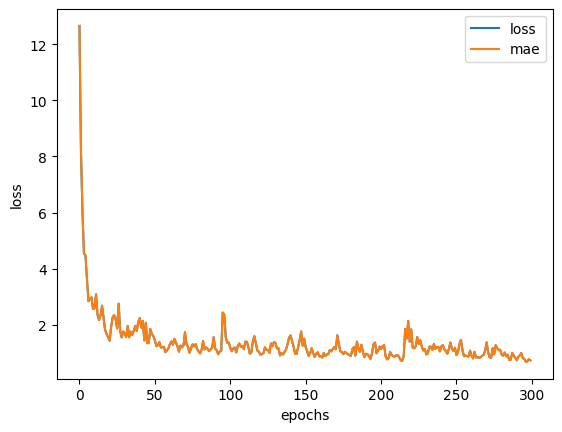

In [21]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [54]:
dataset.head()

,Age,category,Do you feel sad?,Do you feel like you don't enjoy things the way you used to?,Are you disappointed in yourself?,Do you feel like you have failed more than the average person?,Do you have to push yourself very hard to do anything?,How would you describe your current crying patterns?,Are you currently experiencing thoughts of killing yourself?,How would you describe your current level of interest in other people?,\nHow would you compare yourself to others in terms of perceived shortcomings or mistakes?,Are you quite annoyed or irritated a good deal of the time?,Can you sleep as well as usual?,How would you rate your current appetite?,Are you depressed,Reason of depression,score
0,23,college,No,No,No,No,No,Never,No,Very Good,Everyone has some shortcomings,No,Yes,Hungry most of the time,No,NO Reasion,0.0
1,22,college,No,No,No,No,Yes,NaN,No,NaN,NaN,Yes,Yes,Normal,No,NaN,5.0
2,22,college,Sometimes,Yes,No,Maybe,Maybe,Not much,No,Very much interested,Frequently doesn't commit mistakes,No,Yes,Nice,No,i don't know,11.0
3,22,college,Sometimes,Maybe,Yes,No,Maybe,Alone,Nope,None / negligence,Have Ability to takle,Maybe,No,Normal,No,i don't know,11.0
4,21,college,Yes,Yes,Yes,No,Yes,I don't cry,No,Very less,I make mistakes very frequently,Yes,No,Normal,No,nothing,20.0


In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

columns_to_encode = [ "category",
                      "Do you feel sad?",
                      "Reason of depression ",
                      "Do you feel like you don't enjoy things the way you used to?",
                      "Are you disappointed in yourself?",
                      "Do you feel like you have failed more than the average person?",
                      "Do you have to push yourself very hard to do anything?",
                      "How would you describe your current crying patterns?",
                      "Are you currently experiencing thoughts of killing yourself?",
                      "How would you describe your current level of interest in other people?",
                      "\nHow would you compare yourself to others in terms of perceived shortcomings or mistakes?",
                      "Are you quite annoyed or irritated a good deal of the time?",
                      "Can you sleep as well as usual?",
                      "How would you rate your current appetite?",
                      "Are you depressed",
                      ]

label_encoder = LabelEncoder()

for column in columns_to_encode:
  dataset[column] = label_encoder.fit_transform(dataset[column])

ct = make_column_transformer(
    (MinMaxScaler(),  ["Age",
                      "category",
                      "Do you feel sad?",
                      "Reason of depression ",
                      "Do you feel like you don't enjoy things the way you used to?",
                      "Are you disappointed in yourself?",
                      "Do you feel like you have failed more than the average person?",
                      "Do you have to push yourself very hard to do anything?",
                      "How would you describe your current crying patterns?",
                      "Are you currently experiencing thoughts of killing yourself?",
                      "How would you describe your current level of interest in other people?",
                      "\nHow would you compare yourself to others in terms of perceived shortcomings or mistakes?",
                      "Are you quite annoyed or irritated a good deal of the time?",
                      "Can you sleep as well as usual?",
                      "How would you rate your current appetite?",
                      "Are you depressed",
                      ]), # turn all values in these columns between 0-1
)

# create X & y
X = dataset.drop("score", axis=1)
y = dataset["score"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Age,category,Do you feel sad?,Do you feel like you don't enjoy things the way you used to?,Are you disappointed in yourself?,Do you feel like you have failed more than the average person?,Do you have to push yourself very hard to do anything?,How would you describe your current crying patterns?,Are you currently experiencing thoughts of killing yourself?,How would you describe your current level of interest in other people?,\nHow would you compare yourself to others in terms of perceived shortcomings or mistakes?,Are you quite annoyed or irritated a good deal of the time?,Can you sleep as well as usual?,How would you rate your current appetite?,Are you depressed,Reason of depression
24,19,1,1,1,0,1,1,100,69,167,149,1,1,50,53,292
17,21,1,2,2,1,2,2,23,117,112,289,2,1,114,101,271
66,21,1,1,0,1,0,1,48,40,202,23,1,1,20,43,133
302,20,1,1,1,0,1,1,154,40,77,217,1,1,48,53,86
422,20,1,2,2,1,2,0,27,65,261,30,0,0,123,45,135


In [47]:
# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [48]:
X_train_normal[0]

array([0.1       , 0.5       , 0.5       , 0.96052632, 0.5       ,
       0.        , 0.5       , 0.5       , 0.27247956, 0.4822695 ,
       0.49262537, 0.39257294, 0.5       , 1.        , 0.20416667,
       0.42063492])

In [49]:
tf.random.set_seed(42)

dataset_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(400),
    tf.keras.layers.Dense(1)
])

dataset_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

history_2 = dataset_model_2.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=300)

Epoch 1/300
12/12 [==============================] - 3s 12ms/step - loss: 10.2868 - mae: 10.2868
Epoch 2/300
12/12 [==============================] - 0s 9ms/step - loss: 8.7874 - mae: 8.7874
Epoch 3/300
12/12 [==============================] - 0s 7ms/step - loss: 7.5862 - mae: 7.5862
Epoch 4/300
12/12 [==============================] - 0s 9ms/step - loss: 7.3733 - mae: 7.3733
Epoch 5/300
12/12 [==============================] - 0s 10ms/step - loss: 7.4941 - mae: 7.4941
Epoch 6/300
12/12 [==============================] - 0s 12ms/step - loss: 7.2355 - mae: 7.2355
Epoch 7/300
12/12 [==============================] - 0s 11ms/step - loss: 7.0950 - mae: 7.0950
Epoch 8/300
12/12 [==============================] - 0s 10ms/step - loss: 6.8882 - mae: 6.8882
Epoch 9/300
12/12 [==============================] - 0s 12ms/step - loss: 6.9049 - mae: 6.9049
Epoch 10/300
12/12 [==============================] - 0s 8ms/step - loss: 7.1605 - mae: 7.1605
Epoch 11/300
12/12 [==============================]

In [50]:
dataset_model_2.evaluate(X_test_normal, y_test)

3/3 [==============================] - 0s 8ms/step - loss: 6.2707 - mae: 6.2707


[6.270658016204834, 6.270658016204834]

Text(0.5, 0, 'epochs')

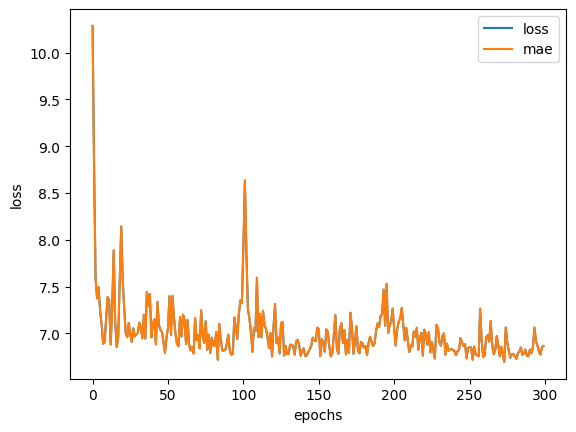

In [51]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")